In [10]:
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt

In [3]:
gs = web.DataReader('078930.KS', 'yahoo', '2018-01-01', '2019-01-11')
gs.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-07,50700.0,49600.0,49650.0,50300.0,118533.0,50300.0
2019-01-08,50600.0,49650.0,50500.0,49900.0,112218.0,49900.0
2019-01-09,51200.0,49750.0,49800.0,50500.0,118926.0,50500.0
2019-01-10,51300.0,50500.0,50600.0,51000.0,202894.0,51000.0
2019-01-11,51500.0,50700.0,51000.0,51300.0,77631.0,51300.0


In [6]:
ma5 = gs['Adj Close'].rolling(window=5).mean()
ma5.tail()

Date
2019-01-07    49600.0
2019-01-08    49260.0
2019-01-09    49660.0
2019-01-10    50190.0
2019-01-11    50600.0
Name: Adj Close, dtype: float64

tail 메서드의 리턴 값을 표 13.2에서 계산한 주가이동평균과 비교해보면 2016-03-01부터 값이 다른 것을 확인할 수 있습니다. 3월 1일은 삼일절로 공휴일이기 때문에 주식시장이 열리지 않습니다. 따라서 해당 일의 로우 데이터는 DataFrame 객체에서 빼고 계산해야 합니다.

공휴일처럼 주식 시장이 열리지 않았던 일자의 데이터를 DataFrame 객체에서 제거하기 위해 먼저 gs.tail()을 사용해 해당 일의 데이터의 특징을 살펴봅시다. 2016-03-01 로우를 살펴보면 거래량(Volume)이 0인 것을 확인할 수 있습니다.

In [7]:
new_gs = gs[gs['Volume'] != 0]
new_gs.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-07,50700.0,49600.0,49650.0,50300.0,118533.0,50300.0
2019-01-08,50600.0,49650.0,50500.0,49900.0,112218.0,49900.0
2019-01-09,51200.0,49750.0,49800.0,50500.0,118926.0,50500.0
2019-01-10,51300.0,50500.0,50600.0,51000.0,202894.0,51000.0
2019-01-11,51500.0,50700.0,51000.0,51300.0,77631.0,51300.0


In [9]:
new_gs.insert(len(new_gs.columns), 'MA5', ma5)
new_gs.tail()

,High,Low,Open,Close,Volume,Adj Close,MA5
Date,,,,,,,
2019-01-07,50700.0,49600.0,49650.0,50300.0,118533.0,50300.0,49600.0
2019-01-08,50600.0,49650.0,50500.0,49900.0,112218.0,49900.0,49260.0
2019-01-09,51200.0,49750.0,49800.0,50500.0,118926.0,50500.0,49660.0
2019-01-10,51300.0,50500.0,50600.0,51000.0,202894.0,51000.0,50190.0
2019-01-11,51500.0,50700.0,51000.0,51300.0,77631.0,51300.0,50600.0


계산된 5일 주가이동평균 값을 좀 더 쉽게 관리하기 위해 DataFrame 객체의 새로운 칼럼으로 추가해봅시다. DataFrame에 칼럼을 추가하려면 insert 메서드를 사용하면 됩니다. insert 메서드의 첫 번째 인자로는 칼럼이 추가될 위치를, 두 번째 인자로는 칼럼의 이름을, 세 번째 인자로는 DataFrame 객체에 추가할 데이터를 전달하면 됩니다.

범례를 표시하기 위해 legend 함수를 호출합니다. 이때 loc 인자를 통해 범례 표시 위치를 지정할 수 있습니다. 범례가 적절한 위치에 자동으로 출력되게 하려면 loc='best' 옵션을 사용하면 됩니다. 또한 그래프의 값을 좀 더 편리하게 확인하기 위한 격자(grid)를 표시하려면 grid 함수를 호출하면 됩니다.

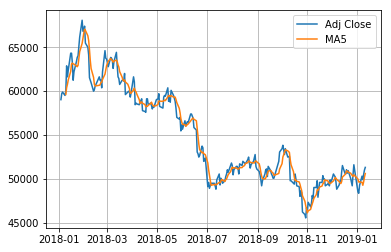

In [12]:
plt.plot(new_gs.index, new_gs['Adj Close'], label='Adj Close')
plt.plot(new_gs.index, new_gs['MA5'], label='MA5')

plt.legend(loc='best')
plt.grid()